In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import sys
import joblib

In [2]:
# Load the dataset
math = pd.read_csv('data/student-mat.csv', delimiter=';')
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
# Load the other dataset
por = pd.read_csv('data/student-por.csv', delimiter=';')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# Concatenate the two dataframes
data = pd.concat([math, por], axis=0)
data.reset_index(drop=True, inplace=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
# Check if there are missing values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# target column
target = data.pop('G3')
target

0        6
1        6
2       10
3       15
4       10
        ..
1039    10
1040    16
1041     9
1042    10
1043    11
Name: G3, Length: 1044, dtype: int64

In [9]:
target.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4,  1], dtype=int64)

In [10]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [11]:
# Make a list of categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
num_cols = data.select_dtypes(exclude=['object']).columns.to_list()

print(cat_cols, num_cols)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [12]:
# Build a transformation pipeline using scikit-learn's column transformer
transf_pipeline = ColumnTransformer([
    ('num_transf', StandardScaler(), num_cols),
    ('cat_transf', OneHotEncoder(), cat_cols),
])

# Transform the training set using `fit_trasform`` method
X_train_prepro = transf_pipeline.fit_transform(X_train)
X_train_prepro.shape

(835, 58)

In [13]:
# Transform the test set using `transform`` method
X_test_prepro = transf_pipeline.transform(X_test)
X_test_prepro.shape

(209, 58)

In [14]:
# Convert the data to tensors
X_trainT = torch.tensor(X_train_prepro).float()
y_trainT = torch.tensor(y_train.to_numpy()).view(-1, 1).float()

X_testT = torch.tensor(X_test_prepro).float()
y_testT = torch.tensor(y_test.to_numpy()).view(-1, 1).float()

In [15]:
# Convert to Tensor Datasets
train_dataset = TensorDataset(X_trainT, y_trainT)
test_dataset = TensorDataset(X_testT, y_testT)

# Translate into Dataloaders
batchsize = 32
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True, drop_last=True)

In [16]:
# Neural Net Architecture
class StudentNet(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        # Input Layer wih batch normalization
        self.inp = nn.Linear(58, 64)
        self.bn_inp = nn.BatchNorm1d(64)

        # Hidden Layers with batch normalization
        self.h1 = nn.Linear(64, 64)
        self.bn1 = nn.BatchNorm1d(64)

        self.h2 = nn.Linear(64, 64)
        self.bn2 = nn.BatchNorm1d(64)

        self.h3 = nn.Linear(64, 64)
        self.bn3 = nn.BatchNorm1d(64)

        self.h4 = nn.Linear(64, 64)
        self.bn4 = nn.BatchNorm1d(64)

        # Output Layer
        self.out = nn.Linear(64, 1)

    def forward(self, X):
        X = self.bn_inp(F.gelu(self.inp(X)))
        X = self.bn1(F.gelu(self.h1(X)))
        X = self.bn2(F.gelu(self.h2(X)))
        X = self.bn3(F.gelu(self.h3(X)))
        X = self.bn4(F.gelu(self.h4(X)))
        X = self.out(X)
        return X        

In [17]:
# Instantiate the Neural Net
net = StudentNet()

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [18]:
# Training Loop
num_epochs = 10

# Initialize the losses
train_losses = []
test_losses = []

# Train for the given number of epochs
for epoch in range(num_epochs):
    
    # Initialize batch losses
    train_batch_losses = []
    test_batch_losses = []

    # Train set
    for count, (X, y) in enumerate(train_loader):
        # Forward Pass
        yHat = net(X)

        # Compute Loss
        loss = criterion(yHat, y)

        # Backprop
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Compute the gradients
        optimizer.step()  # Update rule

        # Compute batch accuracy and store batch loss
        train_batch_losses.append(loss.item())

        # Print training status
        msg = f"Epoch: {epoch+1}/{num_epochs}, Batch: {count}/{batchsize}"
        sys.stdout.write('\r '+ msg)

    # Compute and Store average loss across the batch
    train_losses.append(np.mean(train_batch_losses))

    # Test set
    for count, (X, y) in enumerate(test_loader):
        # Forward pass
        with torch.no_grad():
            yHat = net(X)

        # Compute Loss
        loss = criterion(yHat, y)

         # Compute batch accuracy and store batch loss
        test_batch_losses.append(loss.item())

        # Print test status
        msg = f"Epoch: {epoch+1}/{num_epochs}, Batch: {count}/{batchsize}"
        sys.stdout.write('\r '+ msg)
    
    # Compute and Store average loss across the batch
    test_losses.append(np.mean(test_batch_losses))

 Epoch: 10/10, Batch: 5/322

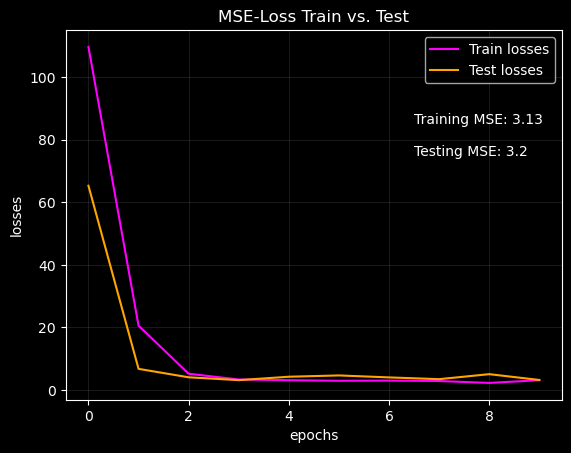

In [19]:
# Plot the losses

plt.plot(train_losses, color='magenta', label='Train losses')
plt.plot(test_losses, color='orange', label='Test losses')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend()
plt.text(6.5, 85, f'Training MSE: {round(train_losses[-1], 2)}')
plt.text(6.5, 75, f'Testing MSE: {round(test_losses[-1], 2)}')
plt.grid(alpha=0.1)
plt.title('MSE-Loss Train vs. Test')
plt.savefig('images/MSE-Loss.png')
plt.show()

In [20]:
# Access the trained transformers in the transformation pipeline
scaler = transf_pipeline.named_transformers_['num_transf']
one_hot_encoder = transf_pipeline.named_transformers_['cat_transf']

In [21]:
# Save the transformers and pipeline
joblib.dump(scaler, 'transformers/scaler.joblib')
joblib.dump(one_hot_encoder, 'transformers/one_hot_encoder.joblib')
joblib.dump(transf_pipeline, 'transformers/pipeline.joblib')

['transformers/pipeline.joblib']

In [22]:
# Save the model
torch.save(net.state_dict(), 'models/model.pt')